# ARIMA

0     303.67
1     296.26
2     317.78
3     273.53
4     276.46
5     306.44
6     280.13
7     289.03
8     327.87
9     322.61
10    330.13
11    297.28
12    320.45
13    300.88
14    290.18
15    306.90
16    321.76
17    319.61
18    295.63
19    267.70
20    292.32
21    284.37
22    308.38
23    327.52
24    311.81
25    357.33
26    352.71
27    319.63
28    312.69
29    299.69
30    282.63
31    316.10
Name: difference, dtype: float64


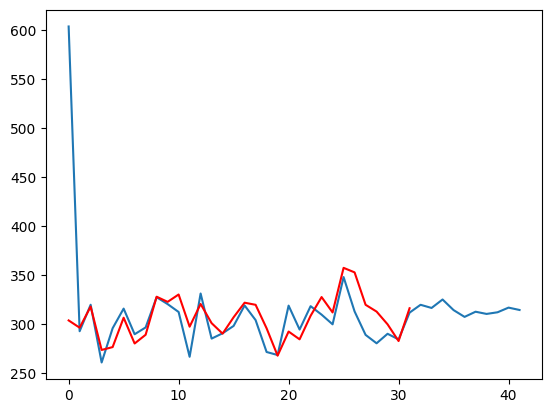

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

data=pd.read_csv("merged_data.csv")

# fit model
data_1Q = data.loc[(data['Huoneluku']=='Yksiöt') & (data['Posti'] == 120)]['difference']
model = ARIMA(data_1Q, order=(5,1,0))
model_fit = model.fit()
# residuals.plot()

steps = 10 # how many to predict

forecast = model_fit.forecast(steps=steps)
prediction = np.append(model_fit.resid.to_numpy()+ 300, forecast)
print(data_1Q)
# plt.plot(np.arange(len(data_1Q), len(data_1Q) + steps), forecast, color='green', label='Forecasted Values')
plt.plot(np.arange(len(data_1Q)+steps), prediction)
plt.plot(range(len(data_1Q)), data_1Q, 'red')

/home/kokatte/Documents/IDC/.venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/kokatte/Documents/IDC/.venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/kokatte/Documents/IDC/.venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


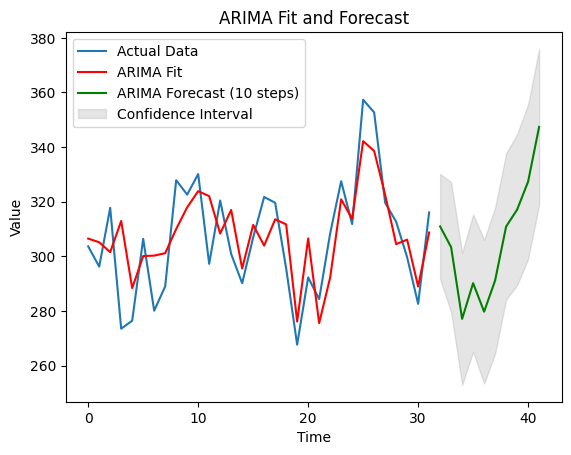

In [45]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Data
data = [303.67, 296.26, 317.78, 273.53, 276.46, 306.44, 280.13, 289.03, 327.87, 322.61,
        330.13, 297.28, 320.45, 300.88, 290.18, 306.90, 321.76, 319.61, 295.63, 267.70,
        292.32, 284.37, 308.38, 327.52, 311.81, 357.33, 352.71, 319.63, 312.69, 299.69,
        282.63, 316.10]

# Create a pandas Series with the data
series = pd.Series(data)

# Fit ARIMA model
model = ARIMA(series, order=(15, 0, 5))  # You may need to adjust the order based on your data characteristics
fit_model = model.fit()

# Forecast future values
forecast_steps = 10
forecast = fit_model.get_forecast(steps=forecast_steps)


# Extracting time indices for the original series and forecast
original_indices = series.index
forecast_indices = pd.RangeIndex(start=len(original_indices), stop=len(original_indices) + forecast_steps)

# Plot the data and the fit with predictions
plt.plot(original_indices, series, label='Actual Data')
plt.plot(original_indices, fit_model.fittedvalues, color='red', label='ARIMA Fit')
plt.plot(forecast_indices, forecast.predicted_mean, color='green', label=f'ARIMA Forecast ({forecast_steps} steps)')

# Plot confidence intervals if available
ci = forecast.conf_int()
plt.fill_between(forecast_indices, ci.iloc[:, 0], ci.iloc[:, 1], color='gray', alpha=0.2, label='Confidence Interval')

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('ARIMA Fit and Forecast')
plt.legend()

# Show the plot
plt.show()
